Loading The Dataset

In [5]:
import pandas as pd

data = pd.read_csv("2) Stock Prices Data Set.csv")
data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [2]:
data.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:

data.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

Preprocessing The Data

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
numerical_missing_columns = ["open","high","low"]
numerical_imputer = SimpleImputer(strategy="mean")
data[numerical_missing_columns] = imputer.fit_transform(data[numerical_missing_columns])

data.isnull().sum()


symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [ ]:
X = pd.DataFrame(data,columns=["open","high","low","volume"])
Y = data["close"]
Y = Y.values.reshape(-1, 1) 


X.shape

(497472, 4)

In [31]:
Y.shape

(497472, 1)

Split Data Into Train And Test

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
results = []

for test_size in test_sizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    Y_predict = regressor.predict(X_test)
    mse = metrics.mean_squared_error(Y_test, Y_predict)
    r2_score = metrics.r2_score(Y_test, Y_predict)
    results.append({'Test_Size': test_size, 'MSE': mse, 'R2 Score': r2_score})
result_data = pd.DataFrame(results)
result_data

,Test_Size,MSE,R2 Score
0,0.10,0.507640,0.999949
1,0.15,0.501626,0.999951
2,0.20,0.508939,0.999951
3,0.25,0.544393,0.999947
4,0.30,0.528921,0.999949


MSE is least for Test Size 0.15

Fit Model and Predict Values

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_predict = regressor.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_predict)
r2_score = metrics.r2_score(Y_test, Y_predict)
mse,r2_score

(0.5016261455383724, 0.99995086496668)

Plot Actual Vs Predicted

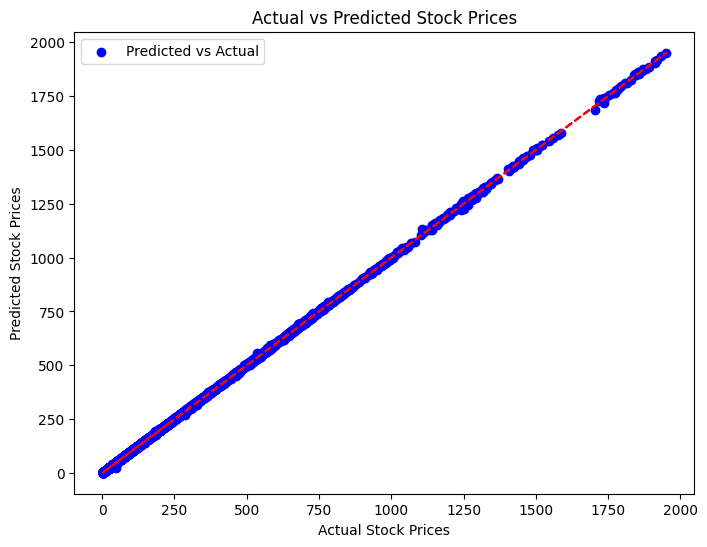

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_predict, color='blue',label="Predicted vs Actual")
plt.plot(Y_test, Y_test, color='red', linestyle='dashed')

plt.xlabel("Actual Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()
